# Presentation slides

In [5]:
from astropy.io import fits
from scipy import signal
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
sys.path.append('/Users/clever/code/sparkles')
import sparkles.Spark as spkl
from importlib import reload

In [10]:
# Paths
selfRM_path = '/Users/clever/code/spk_data/selfRMs/'
selfRM_lab = selfRM_path + 'LAB/'
selfRM_sky = selfRM_path + 'SKY/'

In [16]:
lab_list = os.listdir(selfRM_lab)
lab_list.sort()
lab_list

['selfRM_20230307_08_lab_sparkles_sep20_amp002.fits',
 'selfRM_20230311_12_LAB_loopOff_1800_20stlng.fits',
 'selfRM_20230311_12_LAB_noSpark_0600_fullgains.fits',
 'selfRM_20230311_12_LAB_noSpark_0900_fullgains.fits',
 'selfRM_20230311_12_LAB_noSpark_1200_fullgains.fits',
 'selfRM_20230311_12_LAB_noSpark_1800_000gains.fits',
 'selfRM_20230311_12_LAB_noSpark_1800_020gains.fits',
 'selfRM_20230311_12_LAB_noSpark_1800_040gains.fits',
 'selfRM_20230311_12_LAB_noSpark_1800_060gains.fits',
 'selfRM_20230311_12_LAB_noSpark_1800_20stlng.fits',
 'selfRM_20230311_12_LAB_noSpark_1800_fullgains.fits',
 'selfRM_20230311_12_LAB_spark_0600_010amps_20seps.fits',
 'selfRM_20230311_12_LAB_spark_0600_020amps_20seps.fits',
 'selfRM_20230311_12_LAB_spark_0600_050amps_20seps.fits',
 'selfRM_20230311_12_LAB_spark_0900_010amps_20seps.fits',
 'selfRM_20230311_12_LAB_spark_0900_020amps_20seps.fits',
 'selfRM_20230311_12_LAB_spark_0900_050amps_20seps.fits',
 'selfRM_20230311_12_LAB_spark_1200_010amps_20seps.fits'

In [15]:
sky_list = os.listdir(selfRM_sky)
sky_list.sort()
sky_list

['selfRM_20230304_05_piPup_sparkles_nottriggered.fits',
 'selfRM_20230304_05_piPup_sparkles_triggered.fits',
 'selfRM_20230305_06_betaPic_sparkles_triggered.fits',
 'selfRM_20230307_08_betaPic_sparkles_trigger_sep20_amp02.fits',
 'selfRM_20230309_10_HR4796a_sparkles.fits',
 'selfRM_20230309_10_cutoff.fits',
 'selfRM_20230309_10_noSpark_1200Hz.fits',
 'selfRM_20230310_11_no_sparkles_HD72946b.fits',
 'selfRM_20230310_11_no_sparkles_HD72946b_lower_gain_02.fits',
 'selfRM_20230310_11_trig_sparkles_HD72946b_15ld_05.fits',
 'selfRM_20230311_12_TWA7_sparkles_sep15_amp02.fits',
 'selfRM_20230312_13_HD106906_sep15_amp_02.fits',
 'selfRM_20230312_13_HR2562_sep15_amp_02.fits',
 'selfRM_20230312_13_HR2562_sep15_amp_02_05gains.fits',
 'selfRM_20230312_13_PSF-HD144271_sep13_amp02.fits',
 'selfRM_20230313_14_HD100546_sep15_amp016.fits',
 'selfRM_20230316_0055_BetaPic_spark_020amps_22seps.fits',
 'selfRM_20230316_0250_BetaPic_spark_020amps_22seps.fits',
 'selfRM_20230316_0305_BetaPic_spark_020amps_22s

In [17]:
bPic_A = selfRM_sky + 'selfRM_20230307_08_betaPic_sparkles_trigger_sep20_amp02.fits'
bPic_B = selfRM_sky + 'selfRM_20230305_06_betaPic_sparkles_triggered.fits'
bPic_C1 = selfRM_sky + 'selfRM_20230316_0055_BetaPic_spark_020amps_22seps.fits'
bPic_C2 = selfRM_sky + 'selfRM_20230316_0305_BetaPic_spark_020amps_22seps.fits'
lab_AB = selfRM_lab + 'selfRM_20230315_LAB_spark_1800_020amps_20seps_1Hz.fits'
lab_C = selfRM_lab + 'selfRM_20230316_LAB_spark_1800_020amps_22seps_n20angs.fits'


In [65]:
data_lab_AB = fits.open(lab_AB)[0].data
data_lab_C = fits.open(lab_C)[0].data
data_sky_A = fits.open(bPic_A)[0].data
data_sky_B = fits.open(bPic_B)[0].data
data_sky_C1 = fits.open(bPic_C1)[0].data
data_sky_C2 = fits.open(bPic_C2)[0].data

gain_A_avg, gain_A_std = spkl.return_rolling(np.diag(data_sky_A[4])/ np.diag(data_lab_AB[4]))
gain_B_avg, gain_B_std = spkl.return_rolling(np.diag(data_sky_B[4])/ np.diag(data_lab_AB[4]))
gain_C1_avg, gain_C1_std = spkl.return_rolling(np.diag(data_sky_C1[4])/ np.diag(data_lab_C[4]))
gain_C2_avg, gain_C2_std = spkl.return_rolling(np.diag(data_sky_C2[4])/ np.diag(data_lab_C[4]))

In [85]:
#try2: 
sky_D = selfRM_sky + 'selfRM_20230317_0354_HD95086.fits'
lab_D = selfRM_lab + 'selfRM_20230311_12_LAB_spark_1800_020amps_20seps.fits'
data_sky_D = fits.open(sky_D)[0].data
data_lab_D = fits.open(lab_D)[0].data

In [ ]:
# how to smooth things: 
avg_smoothed_gain_0313, avg_std_gain_0313 = spkl.return_rolling(avg_gain_0313, n=450)

## showing the selfRM cube

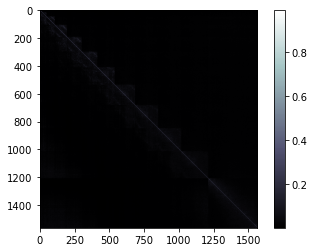

In [39]:
# lab and on sky
data_lab_AB = fits.open(lab_AB)[0].data
plt.imshow(np.abs(data_lab_AB[4]), cmap = 'bone', vmax=.99)
plt.colorbar()
# nevermind, just did this in DS9

## showing  a self RM

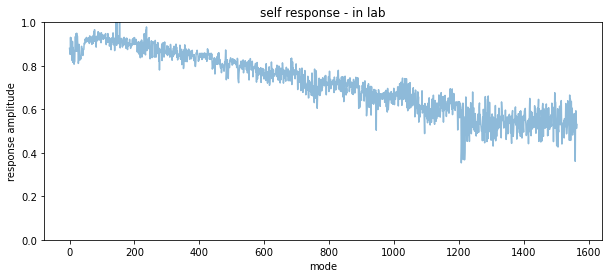

In [110]:
# lab and on sky
fig = plt.figure(figsize=(10,4), facecolor='white')
plt.plot(np.diag(data_lab_D[4]), alpha=0.5)
plt.title('self response - in lab')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)

plt.savefig("plts/ex_lab_gains.png", dpi = 300)
#plt.show()

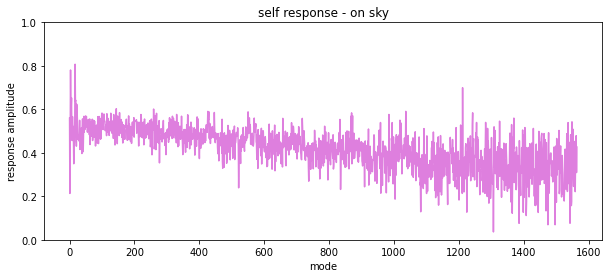

In [109]:
# lab and on sky
fig = plt.figure(figsize=(10,4), facecolor='white')
plt.plot(np.diag(data_sky_D[4]), alpha=0.5, color='m')
plt.title('self response - on sky')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)
#plt.show()
plt.savefig("plts/ex_sky_gains.png", dpi = 300)

# both at once, then Gain

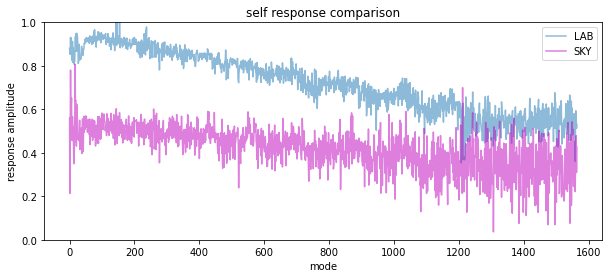

In [94]:
fig = plt.figure(figsize=(10,4), facecolor='white')
plt.plot(np.diag(data_lab_D[4]), label='LAB', alpha=0.5)
plt.plot(np.diag(data_sky_D[4]), label='SKY', alpha=0.5, c='m')
plt.legend()
plt.title('self response comparison')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)
#plt.show()
plt.savefig("plts/ex_compare_gains.png", dpi = 300)

## Showing multiple conditions of gain

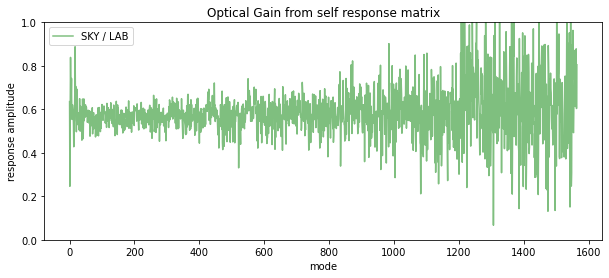

In [117]:
fig = plt.figure(figsize=(10,4), facecolor='white')
plt.plot(np.diag(data_sky_D[4]) / np.diag(data_lab_D[4]), label='SKY / LAB', alpha=0.5, c='green')
plt.legend()
plt.title('Optical Gain from self response matrix')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)
plt.savefig("plts/ex_rough_gains.png", dpi = 300)

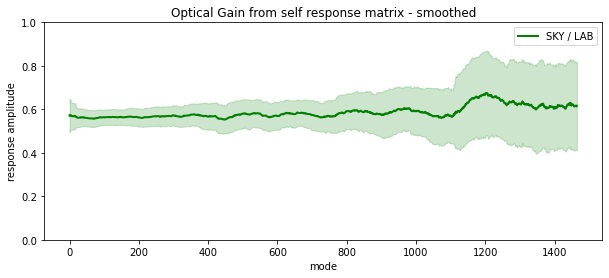

In [118]:
gain_D_avg, gain_D_std = spkl.return_rolling(np.diag(data_sky_D[4])/ np.diag(data_lab_D[4]))

fig = plt.figure(figsize=(10,4), facecolor='white')

plt.plot(gain_D_avg, lw=2, label = f'SKY / LAB', color='green')
plt.fill_between(np.arange(len(gain_D_avg)), gain_D_avg-gain_D_std, gain_D_avg+gain_D_std, alpha=0.2, color='green')
plt.legend()
plt.title('Optical Gain from self response matrix - smoothed')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)
plt.savefig("plts/ex_smooth_gains.png", dpi = 300)

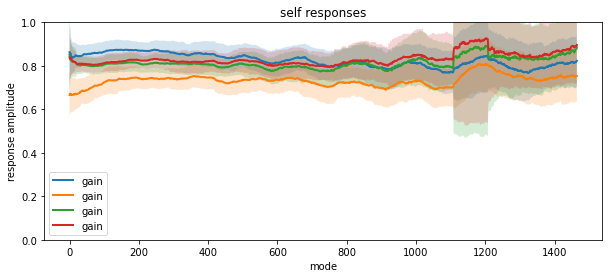

In [67]:
fig = plt.figure(figsize=(10,4), facecolor='white')

plt.plot(gain_A_avg, lw=2, label = f'gain')
plt.fill_between(np.arange(len(gain_A_avg)), gain_A_avg-gain_A_std, gain_A_avg+gain_A_std, alpha=0.2)
plt.plot(gain_B_avg, lw=2, label = f'gain')
plt.fill_between(np.arange(len(gain_B_avg)), gain_B_avg-gain_B_std, gain_B_avg+gain_B_std, alpha=0.2)
plt.plot(gain_C1_avg, lw=2, label = f'gain')
plt.fill_between(np.arange(len(gain_C1_avg)), gain_C1_avg-gain_C1_std, gain_C1_avg+gain_C1_std, alpha=0.2)
plt.plot(gain_C2_avg, lw=2, label = f'gain')
plt.fill_between(np.arange(len(gain_C2_avg)), gain_C2_avg-gain_C2_std, gain_C2_avg+gain_C2_std, alpha=0.2)



plt.legend()
plt.title('self responses')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)
plt.show()


In [ ]:
fig = plt.figure(figsize=(10,4), facecolor='white')

plt.plot(gain_A_avg, lw=2, label = f'gain')
plt.fill_between(np.arange(len(gain_A_avg)), gain_A_avg-gain_A_std, gain_A_avg+gain_A_std, alpha=0.2)

plt.legend()
plt.title('self responses')
plt.ylabel('response amplitude')
plt.xlabel('mode')
plt.ylim(0.0, 1.0)
plt.show()

## multiple seeing

In [69]:
import glob
dir_bad_list = glob.glob(selfRM_sky + "selfRM_20230317_*_HD95086.fits", )
dir_bad_list.sort()

seeing_list = [0.89, 1.2, 1.25, 1.27, 1.3, 1.33, 0.86, 0.73]

In [70]:
dir_bad_list


['/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0354_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0411_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0426_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0432_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0440_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0447_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0457_HD95086.fits',
 '/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0723_HD95086.fits']

/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0354_HD95086.fits
/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0411_HD95086.fits
/Users/clever/code/spk_data/selfRMs/SKY/selfRM_20230317_0440_HD95086.fits


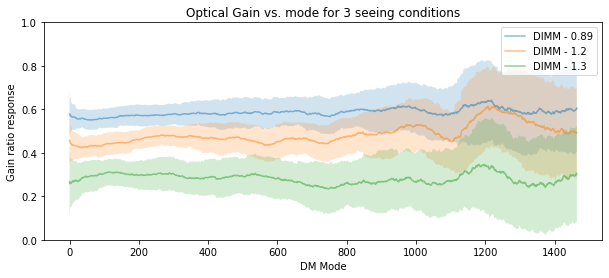

In [119]:
# Plotting all to see more general response
fig = plt.figure(figsize=(10,4), facecolor='white')
plt.title("Optical Gain vs. mode for 3 seeing conditions")

for e in [0,1,4]:
    sky = dir_bad_list[e]
    print(sky)
    sky_tmp = fits.open(sky)[0].data
    lab_tmp = fits.open(selfRM_lab + 'selfRM_20230311_12_LAB_spark_1800_020amps_20seps.fits')[0].data
    data_avg, data_s = spkl.return_rolling(np.diag(sky_tmp[5])/np.diag(lab_tmp[5]), n=100)
    plt.plot(data_avg, alpha=0.5, label=f"DIMM - {seeing_list[e]}")
    plt.fill_between(np.arange(len(data_avg)), data_avg-data_s, data_avg+data_s, alpha=0.2)
    
plt.legend()
plt.ylabel("Gain ratio response")
plt.xlabel("DM Mode")
plt.ylim(top=1, bottom=0)

plt.savefig("plts/gain_ratios_smooth.png", dpi = 300)
plt.show()